<a href="https://colab.research.google.com/github/pedrofranke/ProyectoFinal-Henry/blob/main/EDA_google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de datos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se realiza un análisis exploratorio de los datos, con la finalidad de encontrar patrones que permitan generar información para la toma de decisiones en relación a los restaurantes existentes en los estados de **California**, **Texas**, **Florida**, **New York** & **Pennsylvania**.<br>
Para una lectura mas ordenada, los códigos de gráficos y otros datos se colocaron en funciones dentro de la librería `functions` que se adjunta en este repositorio.

### Importamos las librerias necesarias


In [4]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import functions
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Abrimos el archivo restaurant_clean <br>
Y vemos los primeros registros

In [5]:
df_rest_clean= pd.read_parquet('/content/drive/MyDrive/PF-Henry/google_restaurant_clean.parquet')

Vemos las columnas que hay en el dataset

In [6]:
df_rest_clean.columns

Index(['restaurant_name', 'address', 'state', 'city', 'postal_code',
       'latitude', 'longitude', 'avg_rating', 'num_of_reviews',
       'price_numeric', 'gmap_id'],
      dtype='object')

Modificamos el nombre de las columnas
- avg_rating por *avg_rating_rest*
- num_of_reviews por *num_of_reviews_rest*

In [7]:
df_rest_clean = df_rest_clean.rename(columns={'avg_rating':'avg_rating_rest',
                                      'num_of_reviews': 'num_of_reviews_rest'})

### Abrimos el archivo google_reviews <br>
Y vemos los primeros registros

In [8]:
df_reviews= pd.read_parquet('/content/drive/MyDrive/PF-Henry/google_reviews.parquet')


Vemos las columnas que hay en el dataset.

In [9]:
df_reviews.columns

Index(['user_id', 'user_name', 'time', 'rating', 'text', 'restaurant_name',
       'state', 'city', 'gmap_id'],
      dtype='object')

## Abrimos el archivo google_users <br>
Y vemos los primeros registros

In [10]:
df_users= pd.read_parquet('/content/drive/MyDrive/PF-Henry/google_users.parquet')


Vemos las columnas que hay en el dataset

In [11]:
df_users.columns

Index(['user_id', 'user_name', 'review_count', 'average_rating'], dtype='object')

### Eliminación de columnas <br>
Como se va a realizar una fusión de información entre los conjuntos de datos, se eliminan las columnas 'user_name', 'state', 'city' & ''gmap_id' del **df_reviews**, ya que tienen los mismos datos que en **df_rest_clean** y **df_users**

In [12]:
df_reviews = df_reviews.drop(['user_name', 'state', 'city', 'gmap_id'], axis=1)


## Fusión de información <br>
Unificamos los conjuntos de datos de *df_reviews* con *df_rest_clean* a través de **restaurant_name**

In [13]:
df_1= df_reviews.merge(df_rest_clean, on= 'restaurant_name', how= 'left')


Ahora unificamos los datos de *df_1* con *df_users* a través de **user_id**

In [14]:
df_google = df_1.merge(df_users, on= 'user_id', how= 'left')


In [15]:
df_google.columns

Index(['user_id', 'time', 'rating', 'text', 'restaurant_name', 'address',
       'state', 'city', 'postal_code', 'latitude', 'longitude',
       'avg_rating_rest', 'num_of_reviews_rest', 'price_numeric', 'gmap_id',
       'user_name', 'review_count', 'average_rating'],
      dtype='object')

Eliminamos columnas que no aportan valor. <br>
- average_rating
- review_count
- rating

In [16]:
df_google = df_google.drop(columns=['average_rating', 'review_count', 'rating'], axis=1)

df_google.columns

Index(['user_id', 'time', 'text', 'restaurant_name', 'address', 'state',
       'city', 'postal_code', 'latitude', 'longitude', 'avg_rating_rest',
       'num_of_reviews_rest', 'price_numeric', 'gmap_id', 'user_name'],
      dtype='object')

Convertimos la columna **time** a tipo *datetime* para así poder obtener los datos de año, mes y día y trabajar de forma precisa

In [17]:
df_google['time'] = pd.to_datetime(df_google['time'])

Extraemos los datos de año, mes y día en columnas separadas, y se elimina la columna 'time'

In [18]:
df_google['year'] = df_google['time'].dt.year
df_google['month'] = df_google['time'].dt.month
df_google['day'] = df_google['time'].dt.day

df_google.columns

Index(['user_id', 'time', 'text', 'restaurant_name', 'address', 'state',
       'city', 'postal_code', 'latitude', 'longitude', 'avg_rating_rest',
       'num_of_reviews_rest', 'price_numeric', 'gmap_id', 'user_name', 'year',
       'month', 'day'],
      dtype='object')

In [19]:
df_google = df_google.drop(columns='time', axis=1)

In [20]:
# Prueba

df_google.year.unique()

array([2013, 2015, 2014, 2016, 2017, 2021, 2020, 2019, 2010, 2012, 2009,
       2011, 2018, 2007, 2002, 2003, 2008, 2005, 2004, 2006, 1990])

Encontramos que hay registros de reseñas de años anteriores a 2016, por lo cual no son útiles para el análisis y se procede a eliminarlos.

In [21]:
df_google = df_google[df_google['year'].isin([2016, 2017, 2018, 2019, 2020, 2021])]

In [22]:
df_google

,user_id,text,restaurant_name,address,state,city,postal_code,latitude,longitude,avg_rating_rest,num_of_reviews_rest,price_numeric,gmap_id,user_name,year,month,day
4,107373453968933712290,Used to get lunch here nearly every day. You w...,Raffaello Kosher Pizza,"Raffaello Kosher Pizza, 37 W 46th St, New York...",New York,New York,10036,40.756872,-73.980427,3.4,8,0,0x89c258ffaeaba947:0x8355860772a595a9,Matt Schaffnit,2016,10,25
9,107373453968933712290,Used to get lunch here nearly every day. You w...,Raffaello Kosher Pizza,"Raffaello Kosher Pizza, 37 W 46th St, New York...",New York,New York,10036,40.756872,-73.980427,3.4,8,0,0x89c258ffaeaba947:0x8355860772a595a9,Matt Schaffnit,2016,10,25
10,114661297312109535369,"Today was my first time at Casa Malinche, and ...",Casa Malinche,"Casa Malinche, 3078 Coney Island Ave, Brooklyn...",New York,Brooklyn,11235,40.581086,-73.960139,4.4,7,0,0x89c244427d3e2c19:0xc1dbf7d8e71d7201,Anya,2016,8,19
11,114520850364721926342,Yummy!! Please try the guacamole. You won't re...,Casa Malinche,"Casa Malinche, 3078 Coney Island Ave, Brooklyn...",New York,Brooklyn,11235,40.581086,-73.960139,4.4,7,0,0x89c244427d3e2c19:0xc1dbf7d8e71d7201,TheNaelabean,2017,6,19
12,108986259089914025393,Legit. Real deal burritos and guacamole. Fast ...,Casa Malinche,"Casa Malinche, 3078 Coney Island Ave, Brooklyn...",New York,Brooklyn,11235,40.581086,-73.960139,4.4,7,0,0x89c244427d3e2c19:0xc1dbf7d8e71d7201,Robert Hebron,2017,6,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22549938,115681351373725195193,No Review,Taquitos Mi Rancho,"Taquitos Mi Rancho, 651 E Hopkins St, San Marc...",Texas,San Marcos,78666,29.885066,-97.924276,4.8,88,0,0x865ca94e2edeb237:0xdfc44b585273f4c5,Zoraida Vences,2021,1,26
22549939,115300300663901754734,No Review,Taquitos Mi Rancho,"Taquitos Mi Rancho, 651 E Hopkins St, San Marc...",Texas,San Marcos,78666,29.885066,-97.924276,4.8,88,0,0x865ca94e2edeb237:0xdfc44b585273f4c5,Gabriel Gonzales,2020,12,8
22549940,100925700082850645645,No Review,Taquitos Mi Rancho,"Taquitos Mi Rancho, 651 E Hopkins St, San Marc...",Texas,San Marcos,78666,29.885066,-97.924276,4.8,88,0,0x865ca94e2edeb237:0xdfc44b585273f4c5,Jacqueline Cano,2019,9,27
22549941,109106707670810407931,No Review,Taquitos Mi Rancho,"Taquitos Mi Rancho, 651 E Hopkins St, San Marc...",Texas,San Marcos,78666,29.885066,-97.924276,4.8,88,0,0x865ca94e2edeb237:0xdfc44b585273f4c5,Manuel Martinez,2020,12,11


In [23]:
#Verificamos que se realizaron los cambios

df_google.year.unique()

array([2016, 2017, 2021, 2020, 2019, 2018])

In [24]:
df_google.head(3)

,user_id,text,restaurant_name,address,state,city,postal_code,latitude,longitude,avg_rating_rest,num_of_reviews_rest,price_numeric,gmap_id,user_name,year,month,day
4,107373453968933712290,Used to get lunch here nearly every day. You w...,Raffaello Kosher Pizza,"Raffaello Kosher Pizza, 37 W 46th St, New York...",New York,New York,10036,40.756872,-73.980427,3.4,8,0,0x89c258ffaeaba947:0x8355860772a595a9,Matt Schaffnit,2016,10,25
9,107373453968933712290,Used to get lunch here nearly every day. You w...,Raffaello Kosher Pizza,"Raffaello Kosher Pizza, 37 W 46th St, New York...",New York,New York,10036,40.756872,-73.980427,3.4,8,0,0x89c258ffaeaba947:0x8355860772a595a9,Matt Schaffnit,2016,10,25
10,114661297312109535369,"Today was my first time at Casa Malinche, and ...",Casa Malinche,"Casa Malinche, 3078 Coney Island Ave, Brooklyn...",New York,Brooklyn,11235,40.581086,-73.960139,4.4,7,0,0x89c244427d3e2c19:0xc1dbf7d8e71d7201,Anya,2016,8,19


### Cantidad de reviews mensuales por año <br>
Visualizamos la cantidad de reviews registradas por cada mes, por cada año.

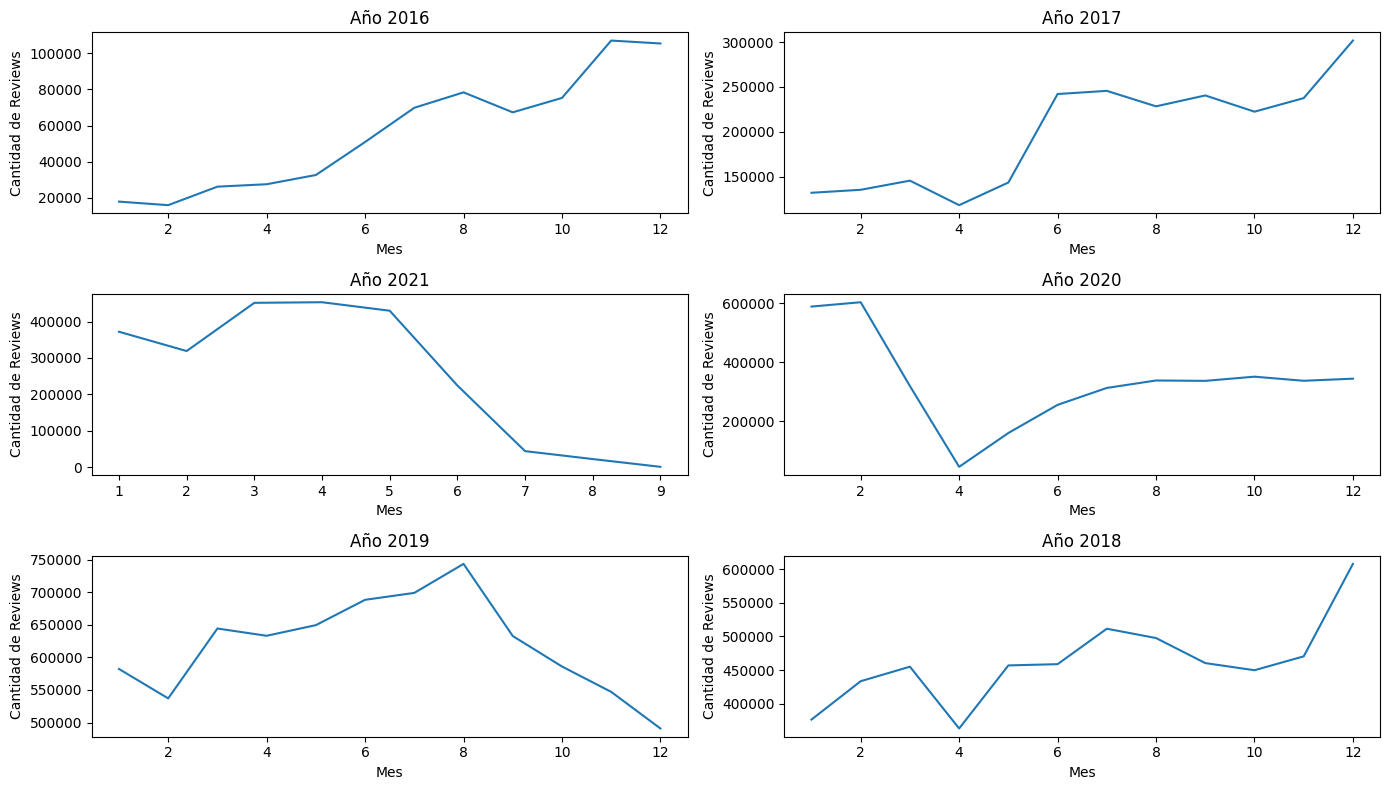

In [28]:

functions.reviews_mensuales(df_google)

En los gráficos no se observan patrones generales, pero si se puede observar una considerable disminución de registros desde febrero de 2020, esto debido a las restricciones impuestas por la cuarentena debido a la pandemia de COVID-19

### Cantidad de reviews por cada mes <br>
En este apartado analizamos las cantidad de reviews registradas por cada mes.

El mes con menor cantidad de reviews tiene 1640096 reviews
El mes con mayor cantidad de reviews tiene 2069626 reviews


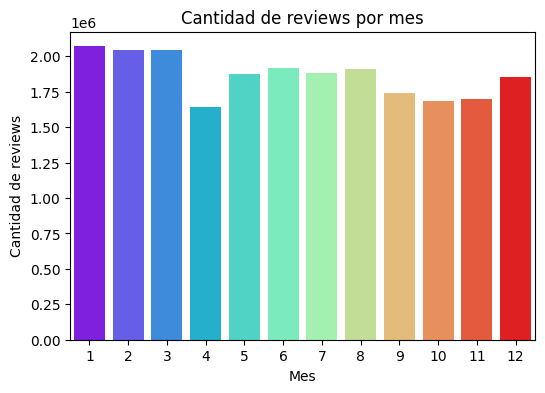

In [29]:
functions.cantidad_de_reviews_por_mes(df_google)

### Cantidad de restaurantes por estado <br>
En este apartado analizamos la cantidad de restaurantes en cada estado y el porcentaje que representan.


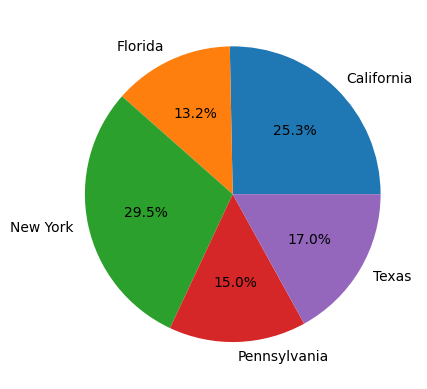

In [30]:
functions.restaurants_por_estado(df_google)

### Promedio de rating por estado <br>
En este apartado analizamos el promedio de rating de todos los restaurantes registrados en cada estado.

In [37]:
functions.promedio_rating_reviews(df_google)

,state,avg_rating_rest
0,California,3.785004
1,Florida,3.673269
2,New York,3.696341
3,Pennsylvania,3.703496
4,Texas,3.627423
